In [1]:
import pandas as pd # importa a biblioteca pandas

In [2]:
df = pd.read_csv('dadosspam.csv') # importa base de dados

In [3]:
df.head() # exibe as 4 primeiras linhas do dataframe

,frequencia_palavras,presenca_links,num_anexos,comprimento_email,spam
0,6,0,1,793,0
1,3,0,1,698,0
2,7,1,1,455,1
3,4,1,1,810,0
4,6,0,3,620,1


In [11]:
x = df.drop('spam',axis=1) # exclui a coluna spam e armazena as outras colunas em axis =1 - porque eu quero excluir a coluna spam
y = df['spam'] # arnazena em y a coluna spam

In [ ]:
x

Importando a biblioteca para dividir os dados em treino e teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,
                                                random_state=42)

In [14]:
#importa as bibliotecas para machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,classification_report

Criando o modelo SVM

In [15]:
model = SVC(kernel='linear') #cria modelo svm

In [16]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
y_prev = model.predict(x_test) #realiza predições

In [ ]:
y_prev # exibe as previsões

In [19]:
#analisando as métricas do modelo
acc = accuracy_score(y_test,y_prev)
acc

0.9866666666666667

In [20]:
# matriz de confusao
cm = confusion_matrix(y_test,y_prev)
cm

array([[149,   0],
       [  4, 147]], dtype=int64)

In [21]:
#Metricas precisão
prec = precision_score(y_test,y_prev)
prec

1.0

In [22]:
# Metrica F1
f1 = f1_score(y_test,y_prev)
f1

0.9865771812080537

In [24]:
# Classification report
relatorio = classification_report(y_test,y_prev,target_names=['Não Spam','Spam'])
print(relatorio)

              precision    recall  f1-score   support

    Não Spam       0.97      1.00      0.99       149
        Spam       1.00      0.97      0.99       151

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [25]:
df.shape # mostra a dimensão da base de dados

(1000, 5)

In [26]:
# Montando a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt 

Matriz de confusão

Text(50.722222222222214, 0.5, 'Real')

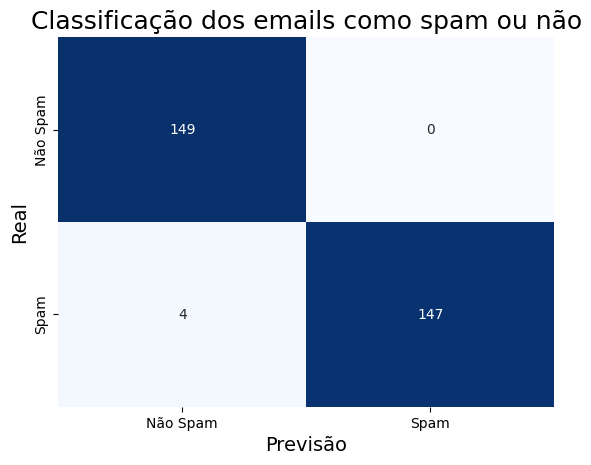

In [27]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Não Spam','Spam'],
            yticklabels=['Não Spam','Spam'])
plt.title('Classificação dos emails como spam ou não',fontsize= 18)
plt.xlabel('Previsão',fontsize=14)
plt.ylabel('Real',fontsize=14)

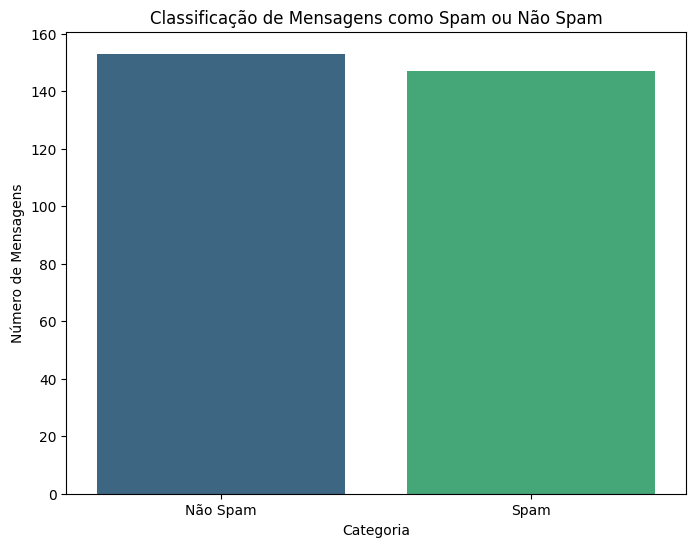

147
153


In [28]:
# Realizando contagem das predições 
# Contagem de predições
spam_count = sum(y_prev)
non_spam_count = len(y_prev) - spam_count

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Não Spam', 'Spam'], y=[non_spam_count, spam_count], palette='viridis') # palete cor do heat map
plt.xlabel('Categoria')
plt.ylabel('Número de Mensagens')
plt.title('Classificação de Mensagens como Spam ou Não Spam')
plt.show()
print(spam_count)
print(non_spam_count)